In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
!pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 69.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=64a4485c92781a4a24f67857127eab7b47758134b09ce1da86e293cb1bc49912
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [81]:
from pydataset import data

df = pd.DataFrame(data("cancer"))
df.head()


,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
6,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
7,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
8,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0


In [82]:
df.dropna(inplace=True)
X = df[["time","sex","ph.ecog","ph.karno","meal.cal","wt.loss"]]
y = df["status"]

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100 , learning_rate=0.1 , random_state=0)
score = cross_val_score(model,X,y,cv=10)
score.mean()

0.7294117647058822

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [86]:
model.fit(X_train , y_train)

GradientBoostingClassifier(random_state=0)

In [87]:
y_pred = model.predict(X_test)

In [88]:
y_pred[:5]

array([1, 2, 1, 2, 2])

In [89]:
y_test.head()

,status
203,1
77,2
170,2
82,2
139,2


In [90]:
from sklearn.metrics import confusion_matrix , classification_report
cm = confusion_matrix(y_test , y_pred)
cm

array([[ 5,  5],
       [ 4, 20]])

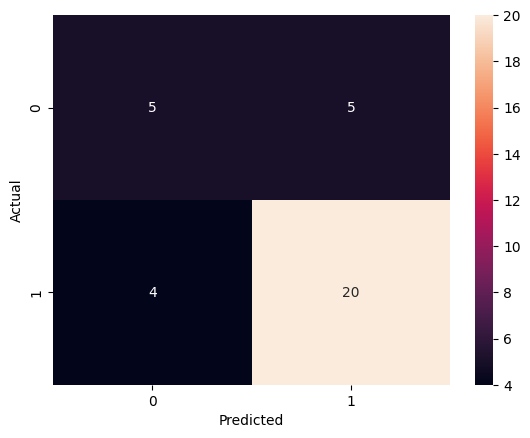

In [91]:
import seaborn as sns
sns.heatmap(cm , annot=True , fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.56      0.50      0.53        10
           2       0.80      0.83      0.82        24

    accuracy                           0.74        34
   macro avg       0.68      0.67      0.67        34
weighted avg       0.73      0.74      0.73        34



In [106]:
### Comparison with Desicion Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_test)

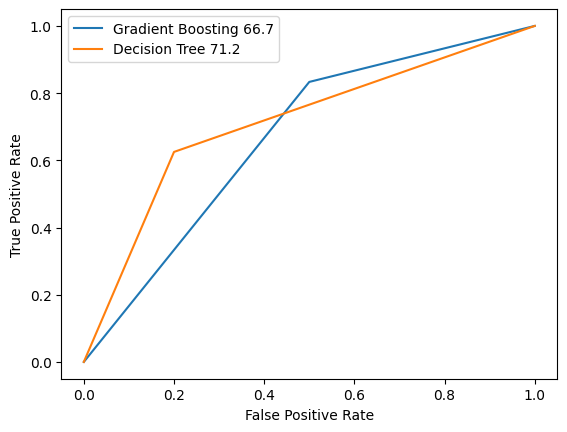

In [110]:
from sklearn.metrics import roc_curve , roc_auc_score

fpr , tpr , _ = roc_curve(y_test,y_pred , pos_label=2 )
gb_score = roc_auc_score(y_test,y_pred)
tree_fpr , tree_tpr , tree_ = roc_curve(y_test , tree_y_pred , pos_label=2)
tree_score = roc_auc_score(y_test,tree_y_pred)


plt.plot(fpr,tpr, label=f"Gradient Boosting {round(gb_score,3)*100}")
plt.plot(tree_fpr , tree_tpr , label=f"Decision Tree {round(tree_score,3)*100}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [104]:
roc_auc_score(y_test,y_pred)

0.6666666666666667